In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 24,
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix'
})

from mpdg_som import SelfOrganizingMap
from mpdg_som_utils import SOM_LearningRateFunctions

import mpdg_som_utils

In [ ]:
#load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')

In [ ]:
SOM = SelfOrganizingMap([16, 16],
                        initialization = 'random')

In [ ]:
SOM.load_data(GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r'],
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])

In [ ]:
SOM.load_standard_deviations(GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err'])

In [ ]:
SOM.build_SOM()

In [ ]:
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(SOM.SOM[:, :, i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

In [ ]:
random_idx = np.random.rand(*SOM.mapsize) * SOM.data_len
random_idx = np.array(random_idx, dtype = int)

In [ ]:
weight_vectors = SOM.data[random_idx]

In [ ]:
distances = np.full(SOM.mapsize, np.nan)
iteration_map = np.nditer(distances, flags = ['multi_index'])

for _ in iteration_map:
    chi_sq_dist = mpdg_som_utils.chi_sq_dist(weight_vectors[*iteration_map.multi_index],
                                             SOM.data[45],
                                             data_dim = 3)
    distances[*iteration_map.multi_index] = chi_sq_dist


argmin_idx = np.argmin(distances)
argmin_coords = np.unravel_index(argmin_idx, SOM.mapsize)

In [ ]:
np.shape(weight_vectors)[:-1]

In [ ]:
distances = np.full(SOM.mapsize, np.nan)
iteration_map = np.nditer(distances, flags = ['multi_index'])

for _ in iteration_map:
    euclid_dist = np.linalg.norm(np.array(argmin_coords) -\
                                 np.array(iteration_map.multi_index))
    distances[*iteration_map.multi_index] = euclid_dist

In [ ]:
argmin_coords

In [ ]:
plt.imshow(np.exp(-distances**2/3))

In [ ]:
count = 0
for i, _ in enumerate(np.shape(n_dim_map)):
    for ii in range(np.shape(n_dim_map)[i]):
        count += 1
        print(count)

In [ ]:
[mpdg_som_utils.chi_sq_dist(weight_vector = weight_vectors[ii, jj],
                           data_vector = SOM.data[0],
                           data_dim = 3) for ii in ]
mpdg_som_utils.chi_sq_dist(weight_vector = weight_vectors,
                           data_vector = SOM.data[0],
                           data_dim = 3)

In [ ]:
if (~use_covariance) & (data_dim is not None):
    covar_matrix = np.diagflat([1] * data_dim)

elif (~use_covariance) & (data_dim is None):
    raise(ValueError('Please pass a dimensionality for the data (number of variables).'))

elif (use_covariance) & (covar_vector is None):
    raise(ValueError('There is no covariance matrix for the given data vector!'))

covar_matrix = np.diagflat(covar_vector)
inv_covar_matrix = linalg.inv(covar_matrix)

vector_difference = data_vector - weight_vector

np.dot(np.dot(vector_difference, inv_covar_matrix),vector_difference)

In [ ]:
for i in np.nditer

In [ ]:
plt.imshow(np.ones(SOM.mapsize))

___

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

from mpdg_som import SelfOrganizingMap
from mpdg_som_utils import SOM_LearningRateFunctions

import mpdg_som_utils
#load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data = GAMA_vect_data[GAMA_vect_data['log_stellar_mass'] < 9.5]

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')
SOM = SelfOrganizingMap([16, 16],
                        initialization = 'random')
SOM.load_data(GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r'],
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])
SOM.load_standard_deviations(GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err'])
SOM.build_SOM()
random_idx = np.random.rand(*SOM.mapsize) * SOM.data_len
random_idx = np.array(random_idx, dtype = int)
weight_vectors = SOM.data[random_idx]

In [ ]:
step0_weights = weight_vectors.copy()

In [ ]:
step = 1
step1_weights = mpdg_som_utils.training_step(step0_weights,
                                             SOM.data[0],
                                             SOM.variances[0],
                                             step,
                                             mpdg_som_utils.SOM_LearningRateFunctions.power_law_lrf,
                                             (1000, 0.5),
                                             mpdg_som_utils.SOM_NeighborhoodFunctions.gaussian_nbh,
                                             (SOM.mapsize, 2))


In [ ]:
step = 1
step1_weights = step0_weights
for index in range(SOM.data_len):
    step1_weights = mpdg_som_utils.training_step(step1_weights,
                                                 SOM.data[index],
                                                 SOM.variances[index],
                                                 step,
                                                 mpdg_som_utils.SOM_LearningRateFunctions.power_law_lrf,
                                                 (1000, 0.5),
                                                 mpdg_som_utils.SOM_NeighborhoodFunctions.gaussian_nbh,
                                                 (SOM.mapsize, 2))

In [ ]:
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(step0_weights[:, :, i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

In [ ]:
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(step1_weights[:, :, i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

In [ ]:
np.max(step1_weights - step0_weights)

___

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

from mpdg_som import SelfOrganizingMap

In [2]:
#load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data = GAMA_vect_data[GAMA_vect_data['log_stellar_mass'] < 9.5]

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')

In [3]:
input_data = GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r']
input_vars = GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err']

In [4]:
normalization_params = {}

for variable in input_data.keys():
    normalization_params[variable] = {}

    normalization_params[variable]['mean'] = np.mean(GAMA_vect_data[variable])
    normalization_params[variable]['std']  = np.std(GAMA_vect_data[variable])

In [5]:
normalized_input_data = input_data.copy()
for variable in input_data.keys():
    
    normalized_input_data[variable] -= normalization_params[variable]['mean']
    normalized_input_data[variable] /= normalization_params[variable]['std']

In [17]:
SOM = SelfOrganizingMap([32, 32],
                        initialization = 'random')

SOM.load_data(normalized_input_data,
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])

SOM.load_standard_deviations(input_vars)

SOM.build_SOM()

| Data statistics 
stat	r_mag	gr_color	surf_bright_r	
min	-10.677	-4.797	-4.918	
max	2.086	3.339	3.399	
mean	-0.000	0.000	0.000	
median	0.162	-0.004	-0.093	
std	1.000	1.000	1.000	| Initial SOM. Step 0. Random initialization.


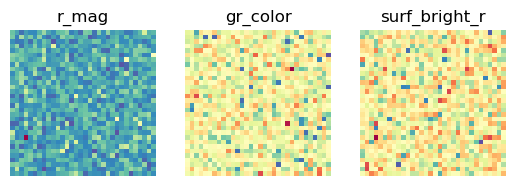

In [18]:
SOM.data_statistics()

print('| Initial SOM. Step 0. Random initialization.')
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(SOM.weights_map[..., i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

In [10]:
SOM.train()

| SOM after training. Step 0.


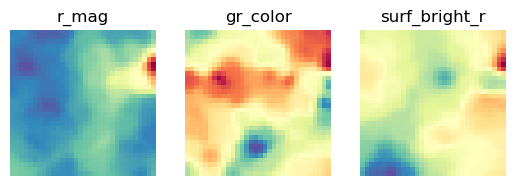

In [15]:
print(f'| SOM after training. Step {SOM.step}.')
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(SOM.weights_map[..., i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

___

Build PCA method

In [9]:
SOM.data

array([[ 0.69933456,  1.5279884 ,  0.03149773],
       [ 1.7813506 , -0.715786  ,  0.70646036],
       [ 0.40360832,  0.14115848,  0.20719843],
       ...,
       [ 1.2332578 ,  0.48225603,  0.16749431],
       [-0.09902429,  0.3569027 ,  0.4579132 ],
       [ 0.64233345, -1.325182  ,  0.06686844]], dtype=float32)

In [10]:
covar_matrix = np.cov(SOM.data, 
                      rowvar = False)
eig_res = np.linalg.eig(covar_matrix)

map_dimensionality = len(SOM.mapsize)

eigenvalues, eigenvectors = np.linalg.eig(covar_matrix)
pca_indices = eigenvalues.argsort()[-map_dimensionality:]
pca_vectors = eigenvectors[pca_indices]

principal_components = np.array([np.dot(SOM.data, pca_vector)\
                                 for pca_vector in pca_vectors])

In [11]:
weight_map = np.full(SOM.SOM, np.nan)
pca_map = np.meshgrid(*[np.linspace(np.min(principal_components[ii]),
                                    np.max(principal_components[ii]),
                                    SOM.mapsize[ii]) for ii in range(map_dimensionality)])

for ii in range(map_dimensionality):
    weight_map[..., ii] = 

SyntaxError: invalid syntax (2390220747.py, line 7)

In [14]:
plt.imshow(pca_map[0])
plt.colorbar()

NameError: name 'pca_map' is not defined

In [112]:
pca_vectors

array([[-0.26753794,  0.02523639,  0.96321679],
       [ 0.67913753, -0.7041936 ,  0.20708355]])

In [111]:
principal_components

array([[-0.11819848,  0.18583175,  0.09515879, ..., -0.15643951,
         0.47656936, -0.14088257],
       [-0.59453267,  1.86013027,  0.21761005, ...,  0.53263534,
        -0.22375341,  1.38326476]])

In [109]:
np.meshgrid(np.linspace(np.min(principal_components[0]), np.max(principal_components[0]), SOM.mapsize[0]),
            np.linspace(np.min(principal_components[1]), np.max(principal_components[1]), SOM.mapsize[1]))

[array([[-3.46252653, -3.23776775, -3.01300897, ...,  3.05547798,
          3.28023676,  3.50499553],
        [-3.46252653, -3.23776775, -3.01300897, ...,  3.05547798,
          3.28023676,  3.50499553],
        [-3.46252653, -3.23776775, -3.01300897, ...,  3.05547798,
          3.28023676,  3.50499553],
        ...,
        [-3.46252653, -3.23776775, -3.01300897, ...,  3.05547798,
          3.28023676,  3.50499553],
        [-3.46252653, -3.23776775, -3.01300897, ...,  3.05547798,
          3.28023676,  3.50499553],
        [-3.46252653, -3.23776775, -3.01300897, ...,  3.05547798,
          3.28023676,  3.50499553]]),
 array([[-8.69949625, -8.69949625, -8.69949625, ..., -8.69949625,
         -8.69949625, -8.69949625],
        [-8.31691229, -8.31691229, -8.31691229, ..., -8.31691229,
         -8.31691229, -8.31691229],
        [-7.93432832, -7.93432832, -7.93432832, ..., -7.93432832,
         -7.93432832, -7.93432832],
        ...,
        [ 2.39543883,  2.39543883,  2.39543883, ...,  

In [106]:
np.linspace(np.min(principal_components[0]), np.max(principal_components[1]), SOM.mapsize[0])

array([-3.46252653, -3.24887706, -3.0352276 , -2.82157814, -2.60792868,
       -2.39427922, -2.18062976, -1.9669803 , -1.75333084, -1.53968137,
       -1.32603191, -1.11238245, -0.89873299, -0.68508353, -0.47143407,
       -0.25778461, -0.04413515,  0.16951431,  0.38316378,  0.59681324,
        0.8104627 ,  1.02411216,  1.23776162,  1.45141108,  1.66506054,
        1.87871   ,  2.09235946,  2.30600893,  2.51965839,  2.73330785,
        2.94695731,  3.16060677])

In [99]:
np.min(principal_components[0])
np.max(principal_components[0])

3.5049955322846156

In [86]:
np.dot(SOM.data, pca_vectors[0])

array([-0.11819848,  0.18583175,  0.09515879, ..., -0.15643951,
        0.47656936, -0.14088257])

In [ ]:
var0_init = np.full(SOM.mapsize, np.nan)

for ii in SOM.mapsize[0]:
    for jj in SOM.mapsize[1]:
        var0_init[ii, jj] =         

In [ ]:
SOM.SOM

In [68]:
pca_indices

array([2, 1])

In [31]:
len(SOM.mapsize)

2

In [29]:
eig_res.eigenvalues

array([0.88904633, 1.10317709, 1.00888849])

In [19]:
eig_res.eigenvalues.argsort()[::-1]

array([1, 2, 0])

In [20]:
eigvecs = eig_res.eigenvectors

In [24]:
np.linalg.norm(eigvecs[2])

1.0

In [25]:
SOM.mapsize

[32, 32]